In [22]:
#import sys
#!{sys.executable} -m pip install pandas_profiling

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import pandas_profiling
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [24]:
#df.profile_report()

In [25]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'PerformanceScore', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [26]:
#converting boolean column to accept int
df["Attrition"] = df.Attrition.replace({'Yes': 1, 'No': 0})
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [27]:
#removing columns that are not reqiured
#ex- categorical columns, unique & constant columns
#categorical, unique and constant columns identified from profiling report
df = df.drop(labels=['Age', 'BusinessTravel', 'EmployeeNumber', 'DistanceFromHome', 'EmployeeCount', 'Department', 'EducationField', 'Gender', 'MaritalStatus', 'JobRole', 'Over18', 'OverTime', 'StandardHours' ], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Attrition                 1470 non-null   int64
 1   DailyRate                 1470 non-null   int64
 2   Education                 1470 non-null   int64
 3   EnvironmentSatisfaction   1470 non-null   int64
 4   PerformanceScore          1470 non-null   int64
 5   JobInvolvement            1470 non-null   int64
 6   JobLevel                  1470 non-null   int64
 7   JobSatisfaction           1470 non-null   int64
 8   MonthlyIncome             1470 non-null   int64
 9   MonthlyRate               1470 non-null   int64
 10  NumCompaniesWorked        1470 non-null   int64
 11  PercentSalaryHike         1470 non-null   int64
 12  PerformanceRating         1470 non-null   int64
 13  RelationshipSatisfaction  1470 non-null   int64
 14  StockOptionLevel          1470 non-null 

In [28]:
df.columns

Index(['Attrition', 'DailyRate', 'Education', 'EnvironmentSatisfaction',
       'PerformanceScore', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [29]:
#getting top 10 columns for the target column Percentage of Salary Hike
#_psh = PercentSalaryHike
x_psh = df[['Attrition', 'DailyRate', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']] #independant columns
y_psh = df['PercentSalaryHike'] #target column

In [30]:
#k=10 means getting top 10 best features
bestFeatures_psh = SelectKBest(score_func=chi2, k=10)
fit_psh = bestFeatures_psh.fit(x_psh,y_psh)

df_Cols_psh = pd.DataFrame(x_psh.columns)
df_Scores_psh = pd.DataFrame(fit_psh.scores_)

#creating the dataframe for better visualisation
ColScores_psh = pd.concat([df_Cols_psh, df_Scores_psh], axis=1)
ColScores_psh.columns = ['Features', 'Score']

#printing top 10 columns
ColScores_psh.nlargest(10,'Score')


,Features,Score
7,MonthlyIncome,43701.782613
8,MonthlyRate,40470.524445
1,DailyRate,2558.652920
18,YearsSinceLastPromotion,166.651691
16,YearsAtCompany,138.439711
13,TotalWorkingYears,65.360162
10,PerformanceRating,60.643658
17,YearsInCurrentRole,58.554547
19,YearsWithCurrManager,43.030684
9,NumCompaniesWorked,28.476396


In [31]:
#getting top 10 columns for the target column Performance Score
#_psc = PerformanceScore
x_psc = df[['Attrition', 'DailyRate', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']] #independant columns
y_psc = df['PerformanceScore'] #target column

In [32]:
#k=10 means getting top 10 best features
bestFeatures_psc = SelectKBest(score_func=chi2, k=10)
fit_psc = bestFeatures_psc.fit(x_psc,y_psc)

df_Cols_psc = pd.DataFrame(x_psc.columns)
df_Scores_psc = pd.DataFrame(fit_psc.scores_)

#creating the dataframe for better visualisation
ColScores_psc = pd.concat([df_Cols_psc, df_Scores_psc], axis=1)
ColScores_psc.columns = ['Features', 'Score']

#printing top 10 columns
ColScores_psc.nlargest(10,'Score')

,Features,Score
8,MonthlyRate,246726.872757
7,MonthlyIncome,224774.388497
1,DailyRate,12898.220525
16,YearsAtCompany,504.438977
13,TotalWorkingYears,433.555133
18,YearsSinceLastPromotion,312.528479
17,YearsInCurrentRole,225.694277
19,YearsWithCurrManager,193.361891
9,NumCompaniesWorked,127.862618
12,StockOptionLevel,72.878549


In [33]:
#Comparing the top 10 features of both target variables and taking only common columns
print(ColScores_psh.nlargest(10,'Score'))
print(ColScores_psc.nlargest(10,'Score'))

#common columns are MonthlyIncome, MonthlyRate, DailyRate, YearsSinceLastPromotion, YearsAtCompany, 
#TotalWorkingYears, YearsInCurrentRole, YearsWithCurrManager, NumCompaniesWorked 


                   Features         Score
7             MonthlyIncome  43701.782613
8               MonthlyRate  40470.524445
1                 DailyRate   2558.652920
18  YearsSinceLastPromotion    166.651691
16           YearsAtCompany    138.439711
13        TotalWorkingYears     65.360162
10        PerformanceRating     60.643658
17       YearsInCurrentRole     58.554547
19     YearsWithCurrManager     43.030684
9        NumCompaniesWorked     28.476396
                   Features          Score
8               MonthlyRate  246726.872757
7             MonthlyIncome  224774.388497
1                 DailyRate   12898.220525
16           YearsAtCompany     504.438977
13        TotalWorkingYears     433.555133
18  YearsSinceLastPromotion     312.528479
17       YearsInCurrentRole     225.694277
19     YearsWithCurrManager     193.361891
9        NumCompaniesWorked     127.862618
12         StockOptionLevel      72.878549


In [34]:
#Common features for both target variables are taken here
df_fs = df[["MonthlyIncome", "MonthlyRate", "DailyRate", "YearsSinceLastPromotion", "YearsAtCompany", 
            "TotalWorkingYears", "YearsInCurrentRole", "YearsWithCurrManager", "NumCompaniesWorked",
            "PercentSalaryHike", "PerformanceScore"]]
df_fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   MonthlyIncome            1470 non-null   int64
 1   MonthlyRate              1470 non-null   int64
 2   DailyRate                1470 non-null   int64
 3   YearsSinceLastPromotion  1470 non-null   int64
 4   YearsAtCompany           1470 non-null   int64
 5   TotalWorkingYears        1470 non-null   int64
 6   YearsInCurrentRole       1470 non-null   int64
 7   YearsWithCurrManager     1470 non-null   int64
 8   NumCompaniesWorked       1470 non-null   int64
 9   PercentSalaryHike        1470 non-null   int64
 10  PerformanceScore         1470 non-null   int64
dtypes: int64(11)
memory usage: 126.5 KB


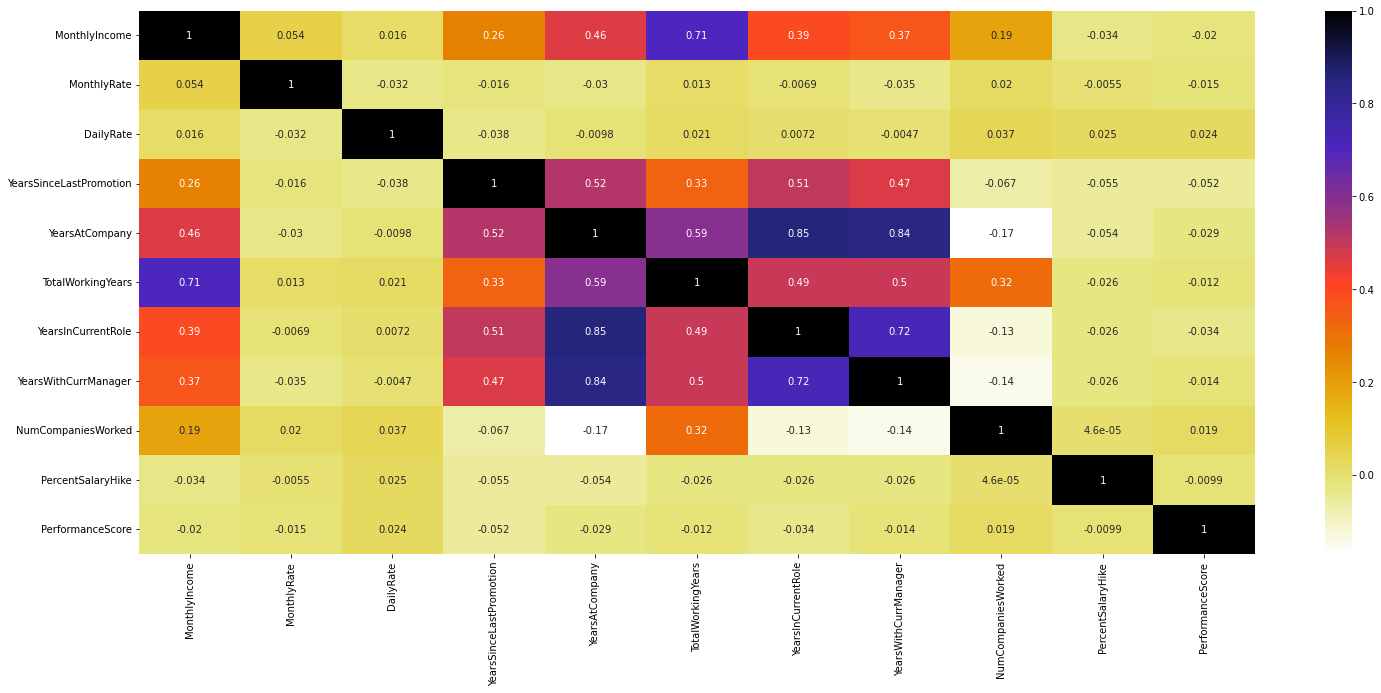

In [35]:
#checking correlation for the dataset
plt.figure(figsize=(25,10))
cor = df_fs.corr(method="spearman")
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [36]:
#function that helps to check the correlated features.
def correlation(dataset, threshold):
    corFeature=set()
    corrMatrix=dataset.corr(method="spearman")
    for i in range(len(corrMatrix.columns)):
        for j in range(i):
            if (corrMatrix.iloc[i,j] > threshold):
                colname = corrMatrix.columns[i]
                corFeature.add(colname)
    return corFeature

corrFeature = correlation(df_fs, 0.8)
corrFeature

{'YearsInCurrentRole', 'YearsWithCurrManager'}

In [37]:
#removing the correlated features from the dataset and vewing finalised features
df_fs.drop(labels=corrFeature, axis=1, inplace=True)
df_fs.columns

Index(['MonthlyIncome', 'MonthlyRate', 'DailyRate', 'YearsSinceLastPromotion',
       'YearsAtCompany', 'TotalWorkingYears', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceScore'],
      dtype='object')

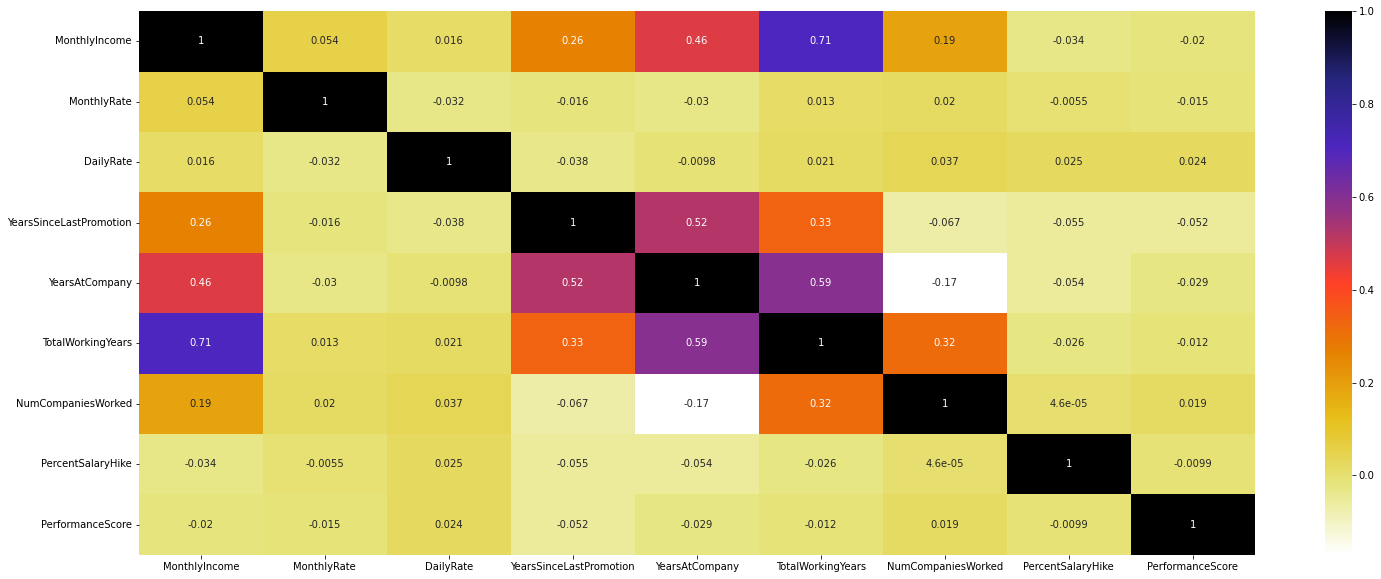

In [38]:
#checking correlation for the final dataset
plt.figure(figsize=(25,10))
cor = df_fs.corr(method="spearman")
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()